In [1]:
!pip install pmdarima

     |████████████████████████████████| 1.4 MB 2.6 MB/s 
     |████████████████████████████████| 9.8 MB 39.8 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import keras
import pmdarima as pm
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plt.style.use('ggplot')

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/rishiraj-cs/Datasets/master/Google_stock.csv')
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2016-03-31,769.080017,758.250000,768.340027,762.900024,1627700,762.900024
1,2016-04-01,770.039978,755.200012,757.159973,769.669983,1583700,769.669983
2,2016-04-04,772.440002,761.789978,769.510010,765.119995,1346200,765.119995
3,2016-04-05,762.869995,755.599976,758.130005,758.570007,1223900,758.570007
4,2016-04-06,768.419983,756.299988,757.840027,768.070007,1265600,768.070007
...,...,...,...,...,...,...,...
1255,2021-03-25,2045.640015,1996.089966,2029.050049,2032.459961,1780800,2032.459961
1256,2021-03-26,2039.390015,2003.849976,2031.790039,2024.729980,1398300,2024.729980
1257,2021-03-29,2049.209961,2005.449951,2022.160034,2045.790039,1324600,2045.790039
1258,2021-03-30,2062.669922,2036.150024,2052.979980,2046.469971,1365600,2046.469971


In [32]:
df.dtypes

Date          object
High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [33]:
from statsmodels.tsa.stattools import adfuller

Text(0, 0.5, 'CLOSE')

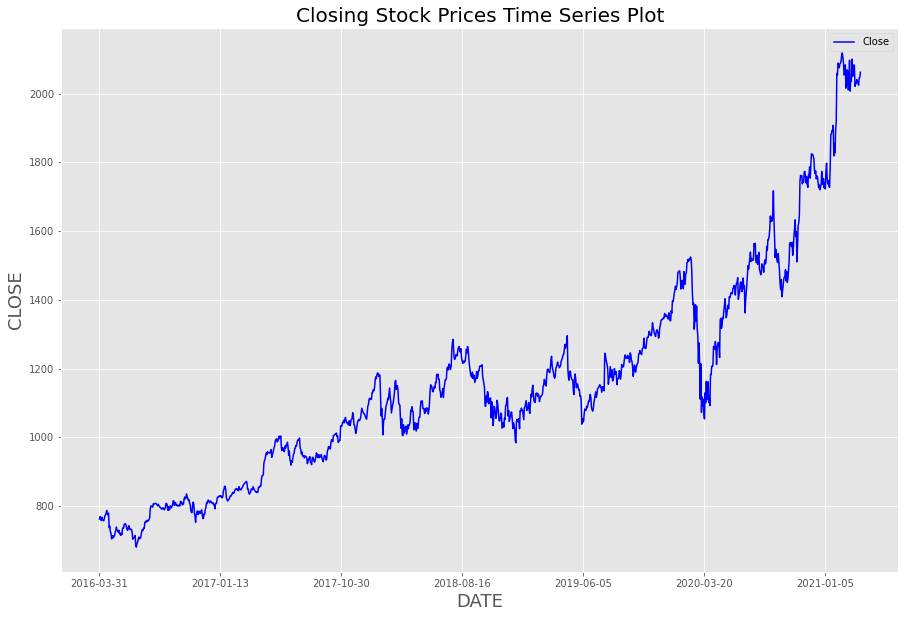

In [34]:
axl = df.plot(kind='line', x='Date', y='Close', color='blue', figsize=(15, 10))
plt.title('Closing Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('CLOSE', size=18)

In [35]:
adFuller = adfuller(df['Close'].values, autolag='AIC')
print(f'P value = {adFuller[1]}')

P value = 0.9864213969120719


In [36]:
df['lag1'] = df['Close'].pct_change(1) 
df['lag2'] = df['Close'].pct_change(2)

Text(0, 0.5, 'lag1')

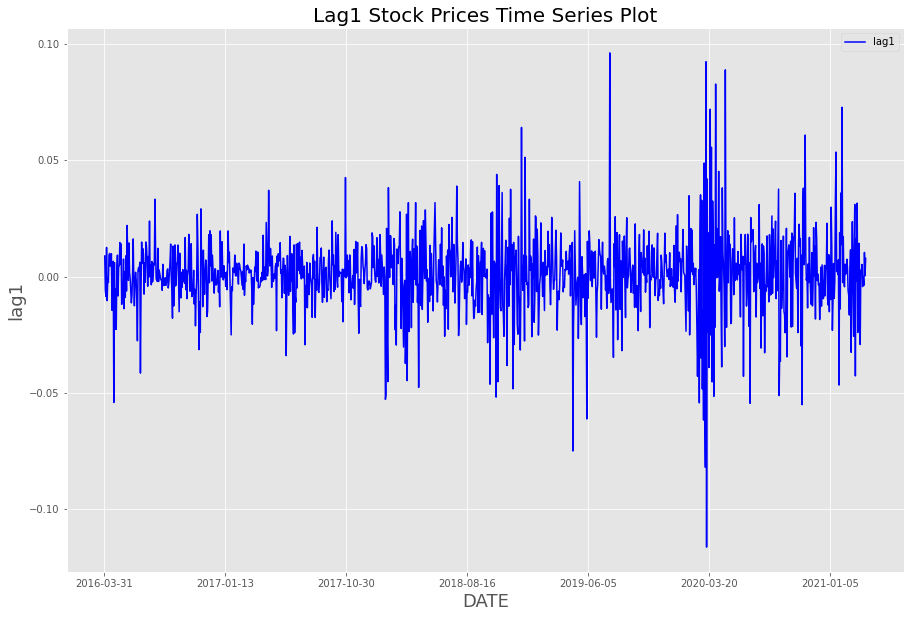

In [37]:
axl = df.plot(kind='line', x='Date', y='lag1', color='blue', figsize=(15, 10))
plt.title('Lag1 Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('lag1', size=18)

In [38]:
adFuller = adfuller(df['lag1'].dropna().values, autolag='AIC')
print(f'P value = {adFuller[1]}')

P value = 1.3896248982914085e-21


Text(0, 0.5, 'lag2')

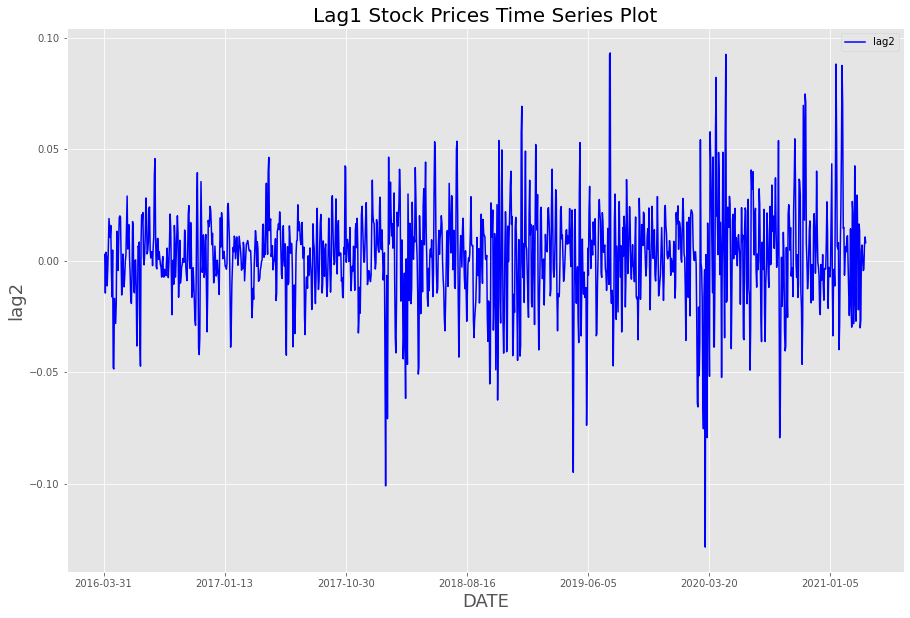

In [39]:
axl = df.plot(kind='line', x='Date', y='lag2', color='blue', figsize=(15, 10))
plt.title('Lag1 Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('lag2', size=18)

In [40]:
adFuller = adfuller(df['lag2'].dropna().values, autolag='AIC')
print(f'P value = {adFuller[1]}')

P value = 2.3326400750713853e-13


In [41]:
df

,Date,High,Low,Open,Close,Volume,Adj Close,lag1,lag2
0,2016-03-31,769.080017,758.250000,768.340027,762.900024,1627700,762.900024,NaN,NaN
1,2016-04-01,770.039978,755.200012,757.159973,769.669983,1583700,769.669983,0.008874,NaN
2,2016-04-04,772.440002,761.789978,769.510010,765.119995,1346200,765.119995,-0.005912,0.002910
3,2016-04-05,762.869995,755.599976,758.130005,758.570007,1223900,758.570007,-0.008561,-0.014422
4,2016-04-06,768.419983,756.299988,757.840027,768.070007,1265600,768.070007,0.012524,0.003856
...,...,...,...,...,...,...,...,...,...
1255,2021-03-25,2045.640015,1996.089966,2029.050049,2032.459961,1780800,2032.459961,-0.000034,-0.004345
1256,2021-03-26,2039.390015,2003.849976,2031.790039,2024.729980,1398300,2024.729980,-0.003803,-0.003838
1257,2021-03-29,2049.209961,2005.449951,2022.160034,2045.790039,1324600,2045.790039,0.010401,0.006559
1258,2021-03-30,2062.669922,2036.150024,2052.979980,2046.469971,1365600,2046.469971,0.000332,0.010737


##ARIMA model

Train and Validation split <br>
The first 80% of the time series (1000 observations) are used as training data. Here is a plot of the autocorrelation function as generated on this training set.

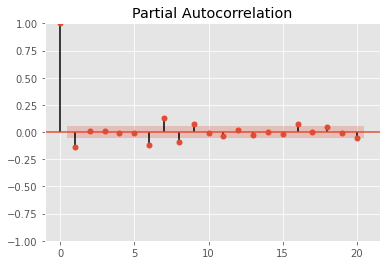

In [42]:
pacf = plot_pacf(df['lag1'].dropna(), lags = 20)

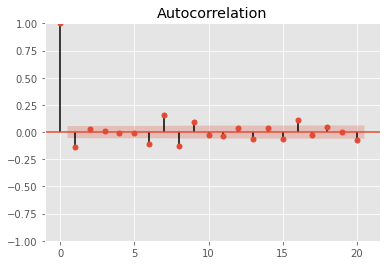

In [43]:
acf = plot_acf(df['lag1'].dropna(), lags = 20)

In [44]:
df = df[['Date', 'Close']]

In [45]:
df.set_index('Date', inplace = True)

In [46]:
df

,Close
Date,
2016-03-31,762.900024
2016-04-01,769.669983
2016-04-04,765.119995
2016-04-05,758.570007
2016-04-06,768.070007
...,...
2021-03-25,2032.459961
2021-03-26,2024.729980
2021-03-29,2045.790039


In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [47]:
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(df['Close'][0:1200], order=(9,1,9))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 1200
Model:                 ARIMA(9, 1, 9)   Log Likelihood               -5240.394
Date:                Thu, 04 Nov 2021   AIC                          10518.789
Time:                        17:48:15   BIC                          10615.484
Sample:                             0   HQIC                         10555.215
                               - 1200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0772      0.429      0.180      0.857      -0.763       0.917
ar.L2         -0.0258      0.356     -0.072      0.942      -0.724       0.672
ar.L3          0.0439      0.304      0.144      0.8

In [48]:
predict = model_fit.predict(start = 0, end = len(df)-1, dynamic = False)

In [49]:
df['predict'] = predict.values
df

,Close,predict
Date,,
2016-03-31,762.900024,0.000000
2016-04-01,769.669983,762.860340
2016-04-04,765.119995,768.788247
2016-04-05,758.570007,765.765816
2016-04-06,768.070007,759.444981
...,...,...
2021-03-25,2032.459961,1732.447577
2021-03-26,2024.729980,1732.010913
2021-03-29,2045.790039,1732.385823


In [50]:
test = df[1200:]
rmse = sqrt(mean_squared_error(test['Close'], test['predict']))
r2 = r2_score(test['Close'], test['predict'], multioutput='variance_weighted')
print(f'RMSE Error = {rmse}, R2_Score = {r2}')

RMSE Error = 275.19512176524404, R2_Score = -3.8787283680462927


In [51]:
df.reset_index(inplace = True)
df

,Date,Close,predict
0,2016-03-31,762.900024,0.000000
1,2016-04-01,769.669983,762.860340
2,2016-04-04,765.119995,768.788247
3,2016-04-05,758.570007,765.765816
4,2016-04-06,768.070007,759.444981
...,...,...,...
1255,2021-03-25,2032.459961,1732.447577
1256,2021-03-26,2024.729980,1732.010913
1257,2021-03-29,2045.790039,1732.385823
1258,2021-03-30,2046.469971,1732.803361


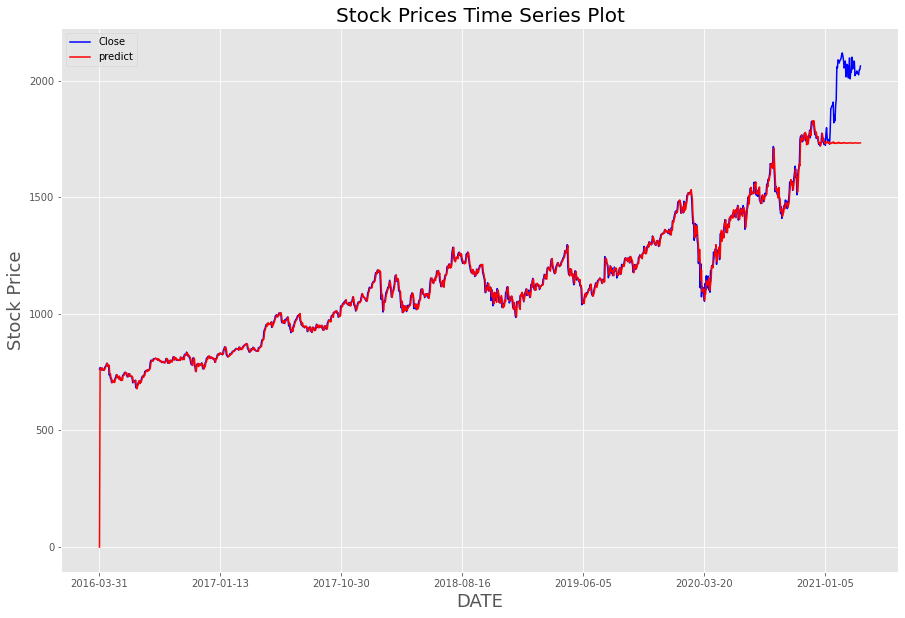

In [52]:
axl = df.plot(kind='line', x='Date', y='Close', color='blue', figsize=(15, 10))
df.plot(kind='line', x='Date', y='predict', color='red', figsize=(15, 10), ax = axl)
plt.title('Stock Prices Time Series Plot', size=20)
plt.xlabel('DATE', size=18)
plt.ylabel('Stock Price', size=18)
plt.legend()
plt.show()

##LSTM

In [53]:
train = df['Close'][0:1125].values
test = df['Close'][1125:].values

In [54]:
train_size = len(train)
test_size = len(test)

In [55]:
train = np.expand_dims(train,axis=1)
test = np.expand_dims(test,axis=1)

In [56]:
def create_dataset(df, previous=1):
    dataX, dataY = [], []
    for i in range(len(df)-previous-1):
        a = df[i:(i+previous), 0]
        dataX.append(a)
        dataY.append(df[i + previous, 0])
    return np.array(dataX), np.array(dataY)

In [57]:
scaler = MinMaxScaler(feature_range=(0, 1))
train = scaler.fit_transform(train)

In [58]:
test = scaler.fit_transform(test)

In [59]:
lookback = 5
X_train, Y_train = create_dataset(train, lookback)
X_test, Y_test = create_dataset(test, lookback)

In [60]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1119, 5) (1119,) (129, 5) (129,)


In [61]:
# reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(1119, 1, 5) (1119,) (129, 1, 5) (129,)


In [62]:
# Generate LSTM network
model = keras.models.Sequential()
model.add(keras.layers.LSTM(4, input_shape=(1, lookback)))
model.add(keras.layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
history=model.fit(X_train, Y_train, validation_split=0.1, epochs=100, batch_size=8, verbose=2)

Epoch 1/100
126/126 - 3s - loss: 0.0382 - val_loss: 0.0126
Epoch 2/100
126/126 - 0s - loss: 0.0028 - val_loss: 0.0034
Epoch 3/100
126/126 - 0s - loss: 0.0015 - val_loss: 0.0014
Epoch 4/100
126/126 - 0s - loss: 8.9530e-04 - val_loss: 8.8127e-04
Epoch 5/100
126/126 - 0s - loss: 6.3300e-04 - val_loss: 0.0010
Epoch 6/100
126/126 - 0s - loss: 5.5295e-04 - val_loss: 0.0013
Epoch 7/100
126/126 - 0s - loss: 5.2714e-04 - val_loss: 0.0012
Epoch 8/100
126/126 - 0s - loss: 5.1223e-04 - val_loss: 0.0014
Epoch 9/100
126/126 - 0s - loss: 4.9787e-04 - val_loss: 0.0012
Epoch 10/100
126/126 - 0s - loss: 4.8237e-04 - val_loss: 0.0012
Epoch 11/100
126/126 - 0s - loss: 4.7629e-04 - val_loss: 0.0011
Epoch 12/100
126/126 - 0s - loss: 4.5564e-04 - val_loss: 0.0012
Epoch 13/100
126/126 - 0s - loss: 4.4588e-04 - val_loss: 9.1580e-04
Epoch 14/100
126/126 - 0s - loss: 4.3196e-04 - val_loss: 8.6510e-04
Epoch 15/100
126/126 - 0s - loss: 4.2473e-04 - val_loss: 8.2805e-04
Epoch 16/100
126/126 - 0s - loss: 4.1027e-04 

dict_keys(['loss', 'val_loss'])


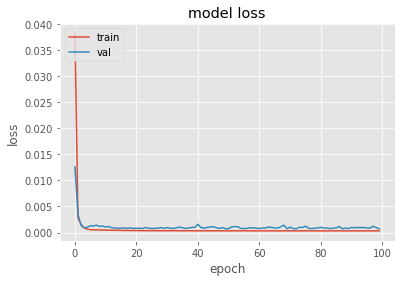

In [63]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [64]:
test_prediction = model.predict(X_test)
test_prediction = scaler.inverse_transform(test_prediction)
Y_test = scaler.inverse_transform([Y_test])

In [65]:
test_prediction.shape

(129, 1)

In [66]:
Y_test.shape

(1, 129)

In [67]:
Y_test = Y_test.reshape(-1)
test_prediction = test_prediction.reshape(-1)

No handles with labels found to put in legend.


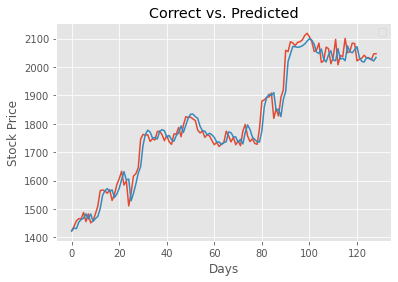

In [69]:
plt.plot(Y_test)
plt.plot(test_prediction)
plt.xlabel('Days')
plt.ylabel('Stock Price')
plt.title("Correct vs. Predicted")
plt.legend()
plt.show()

In [70]:
mse = mean_squared_error(Y_test, test_prediction)
rmse = math.sqrt(mse)
print('RMSE: %f' % rmse)

RMSE: 34.481809


##Prophet

In [71]:
pip install fbprophet

In [72]:
from fbprophet import Prophet

In [73]:
my_model = Prophet(interval_width=0.95)

In [74]:
df

,Date,Close,predict
0,2016-03-31,762.900024,0.000000
1,2016-04-01,769.669983,762.860340
2,2016-04-04,765.119995,768.788247
3,2016-04-05,758.570007,765.765816
4,2016-04-06,768.070007,759.444981
...,...,...,...
1255,2021-03-25,2032.459961,1732.447577
1256,2021-03-26,2024.729980,1732.010913
1257,2021-03-29,2045.790039,1732.385823
1258,2021-03-30,2046.469971,1732.803361


In [75]:
df.drop(columns = ['predict'], inplace = True)
df.columns = ['ds', 'y']

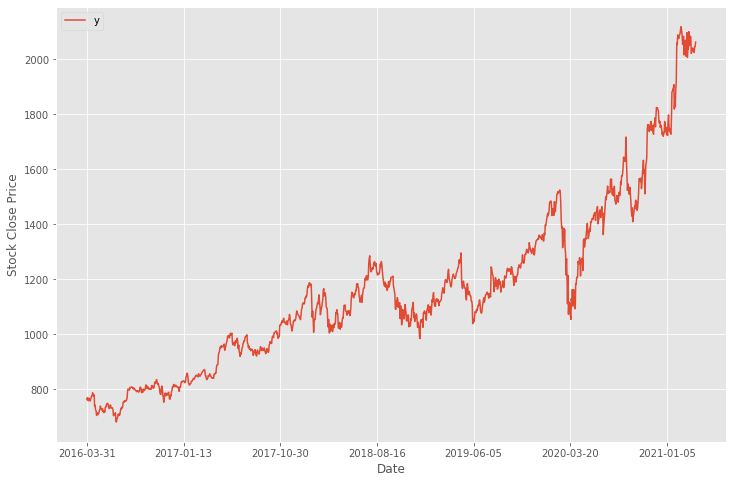

In [76]:
ax = df.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Stock Close Price')
ax.set_xlabel('Date')
plt.show()

In [77]:
my_model = Prophet(interval_width=0.95)

In [78]:
train = df[:1125]
test = df[1125:]

In [79]:
my_model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [80]:
df

,ds,y
0,2016-03-31,762.900024
1,2016-04-01,769.669983
2,2016-04-04,765.119995
3,2016-04-05,758.570007
4,2016-04-06,768.070007
...,...,...
1255,2021-03-25,2032.459961
1256,2021-03-26,2024.729980
1257,2021-03-29,2045.790039
1258,2021-03-30,2046.469971


In [81]:
future_dates = my_model.make_future_dataframe(periods=135, freq='B')
future_dates.tail()

,ds
1255,2021-03-18
1256,2021-03-19
1257,2021-03-22
1258,2021-03-23
1259,2021-03-24


In [82]:
forecast = my_model.predict(future_dates)

In [83]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-03-31,750.585790,570.858568,793.026566,750.585790,750.585790,-65.320983,-65.320983,-65.320983,-0.980786,-0.980786,-0.980786,-64.340197,-64.340197,-64.340197,0.0,0.0,0.0,685.264807
1,2016-04-01,750.702393,576.998539,791.620943,750.702393,750.702393,-64.489476,-64.489476,-64.489476,-2.128206,-2.128206,-2.128206,-62.361270,-62.361270,-62.361270,0.0,0.0,0.0,686.212917
2,2016-04-04,751.052203,573.587985,802.453260,751.052203,751.052203,-59.134387,-59.134387,-59.134387,-3.586810,-3.586810,-3.586810,-55.547578,-55.547578,-55.547578,0.0,0.0,0.0,691.917816
3,2016-04-05,751.168806,584.121831,803.716381,751.168806,751.168806,-55.373913,-55.373913,-55.373913,-2.247092,-2.247092,-2.247092,-53.126820,-53.126820,-53.126820,0.0,0.0,0.0,695.794894
4,2016-04-06,751.285410,587.130184,806.496228,751.285410,751.285410,-51.708155,-51.708155,-51.708155,-1.011146,-1.011146,-1.011146,-50.697009,-50.697009,-50.697009,0.0,0.0,0.0,699.577255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1255,2021-03-18,1663.954543,1478.247510,1741.488335,1585.111746,1734.755823,-57.752544,-57.752544,-57.752544,-0.980786,-0.980786,-0.980786,-56.771758,-56.771758,-56.771758,0.0,0.0,0.0,1606.201999
1256,2021-03-19,1664.758438,1474.906320,1735.966429,1585.296434,1736.257923,-62.164330,-62.164330,-62.164330,-2.128206,-2.128206,-2.128206,-60.036124,-60.036124,-60.036124,0.0,0.0,0.0,1602.594108
1257,2021-03-22,1667.170124,1468.324452,1736.514471,1585.820646,1740.764222,-70.747424,-70.747424,-70.747424,-3.586810,-3.586810,-3.586810,-67.160615,-67.160615,-67.160615,0.0,0.0,0.0,1596.422699
1258,2021-03-23,1667.974019,1466.941960,1735.272860,1585.984836,1742.266322,-70.846021,-70.846021,-70.846021,-2.247092,-2.247092,-2.247092,-68.598928,-68.598928,-68.598928,0.0,0.0,0.0,1597.127998


In [84]:
predicted = forecast['yhat'][1125:]

In [85]:
from math import sqrt
error = sqrt(mean_squared_error(test['y'], predicted))
print('Test RMSE: %.3f' % error)

Test RMSE: 257.433


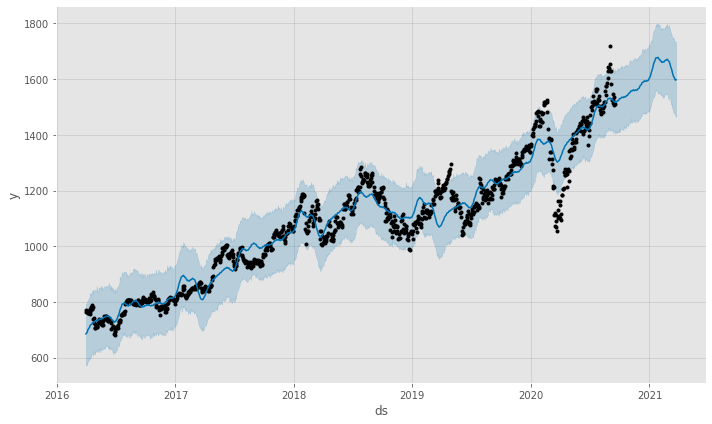

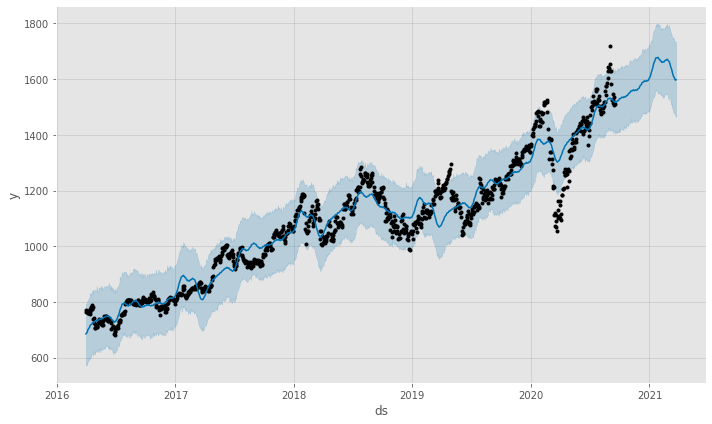

In [86]:
my_model.plot(forecast, uncertainty=True)

#**Conclusion** LSTM Model RMSE is lowest for test dataset. This shows LSTM model best fits the given Stock prices